# SIDEWALL SUPPLY AIR JET ANALYSIS
---

In [1]:
import warnings
import numpy as np

from hvac import Quantity
from hvac.fluids import CoolPropWarning
from hvac.air_diffusion import RoomInfo, analyze_side_wall_supply

from sidewall_supply_plotter import JetPlotter

In [2]:
warnings.filterwarnings('ignore', category=CoolPropWarning)
Q_ = Quantity

## Room Properties

In [3]:
room = RoomInfo(
    L=Q_(23 / 4, 'm'),
    B=Q_(11, 'm'),
    H=Q_(6, 'm'),
    Z=Q_(1.8, 'm'),
    T_r=Q_(26, 'degC'),
    Q_dot=Q_(25.452 / 4, 'kW')
)

## Sidewall Supply Properties

- throw constant *K1* of the supply outlet
- effective width *b<sub>o</sub>* and height *h<sub>o</sub>* of the supply opening
- height between the upper edge of the supply outlet and the ceiling *d*

In [4]:
K1 = 0.5
b_o, h_o = Q_(7930, 'mm'), Q_(250 * np.sin(120 * (np.pi / 180)), 'mm')
d = Q_(0.5, 'm')

## Running the Analysis

In [36]:
sws = analyze_side_wall_supply(room, b_o, h_o, d, K1, Ar_r_crit=11_000)
print(sws.output)

minimum room air change rate: 7.73 1/h
minimum supply air volume flow rate: 2931.8 m³/h
supply air temperature: 19 °C
supply air/room air temperature difference: -6.6 K
supply air velocity: 0.47 m/s
supply air momentum: 0.5 N
mean room air speed: 0.06 m/s
throw to 0.5 m/s: nan m
effective area of ATD: 1.7169 m²
aspect ratio of ATD: 36.627 dimensionless
effective length of ATD: 7930 mm
effective height of ATD: 217 mm
maximum allowable air jet drop: 3.16 m


## Plotting the Charts

In [37]:
plotter = JetPlotter(sws, room, L=Q_(23, 'm'))

### Trajectory

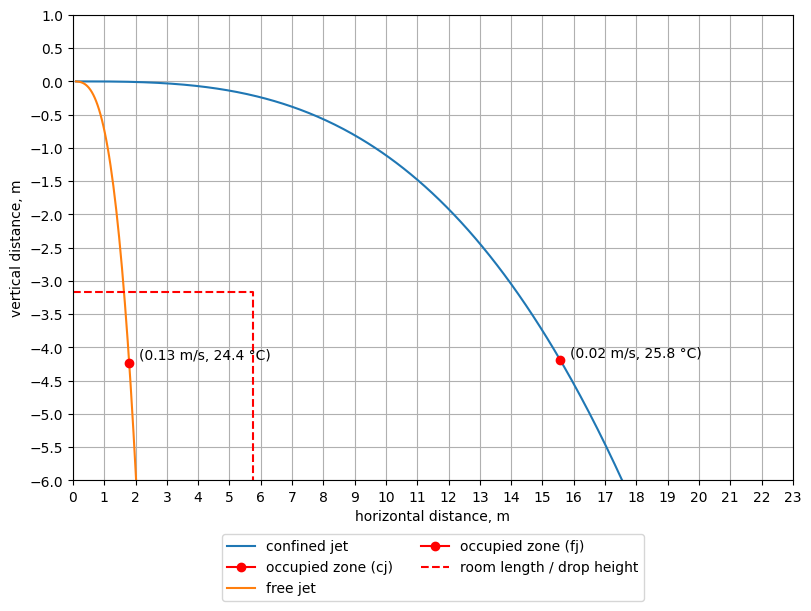

In [38]:
chart = plotter.plot_jet_trajectory()
chart.show()

## Velocity

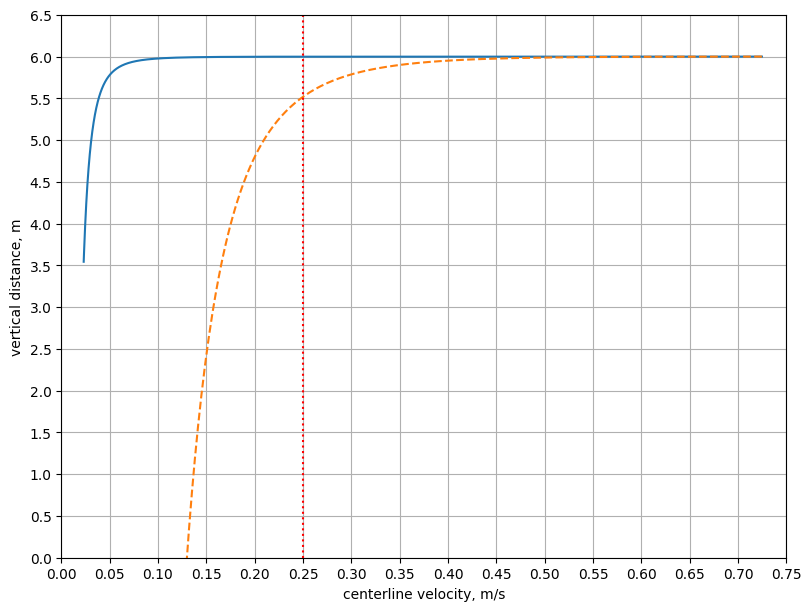

In [18]:
chart = plotter.plot_jet_velocity()
chart.show()

### Temperature

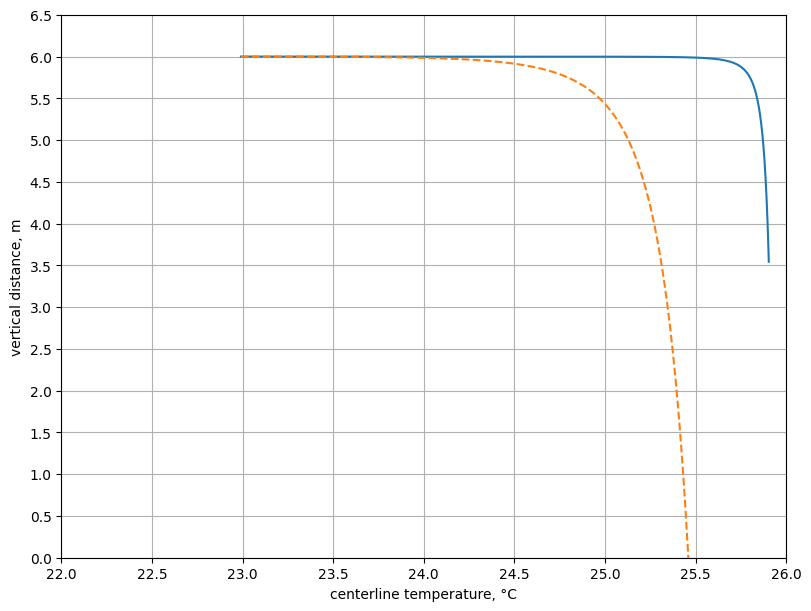

In [19]:
chart = plotter.plot_jet_temperature()
chart.show()